### 药物联合作用数据集处理
#### 一、基本工作
1.导包

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn import model_selection

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.preprocessing import StandardScaler, scale
from sklearn.cluster import DBSCAN
from sklearn.feature_selection import SelectFromModel

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn import decomposition

from itertools import cycle
from scipy import interp
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

ModuleNotFoundError: No module named 'numpy'

2.读取数据

In [85]:
df_original = pd.read_csv('药物联合作用数据集.csv', header=None, skiprows=1)
df_original = df_original.drop(0, axis=1)
df_original.columns = range(0, 4807)
df_original[4806] = df_original[4806].astype(int)
df_original.head(10)

,0,1,2,3,4,5,6,7,8,9,...,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,0
1,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,0
2,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,0
3,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,0
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,1
5,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,0
6,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,0
7,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,0
8,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,1
9,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.24647,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.06814,1


3.划分特征

In [86]:
x = df_original.iloc[:, :-1]
y = df_original.iloc[:, -1]

finger_a = x.iloc[:, 0:881]
finger_b = x.iloc[:, 1914:2795]
phychem_a = x.iloc[:, 881:936]
phychem_b = x.iloc[:, 2795:2850]
express_a = x.iloc[:, 936:1914]
express_b = x.iloc[:, 2850:3828]
cell_line = x.iloc[:, 3828:4806]

x_reverse = pd.concat([finger_a, finger_b, phychem_a, phychem_b, express_a, express_b, cell_line], axis=1)
y_reverse = y

df_reverse = pd.concat([x_reverse, y_reverse], axis=1)

# stander = MinMaxScaler()
# x = stander.fit_transform(x)

# 训练集属性顺序：finger_a phychem_a express_a finger_b phychem_b express_b cell_line
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

# clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
# clf.fit(x_train, y_train)

x_train_reverse, x_test_reverse, y_train_reverse, y_test_reverse = train_test_split(x_reverse, y_reverse, test_size=0.3)


#### 二、准备工作
1.由于该数据集是三类划分，auc无法直接使用有些模型（如LinearSVC）中自带的函数进行计算。所以我们定义一个计算auc的函数（这个函数只对一个分类器有效果，若分类过程中涉及两个分类器如离群点的分类器和非离群点的分类器时，这个函数不适用）。由于auc不是我们重点需要关注的，所以这个函数返回的结果只作为参考。

In [87]:
# 定义计算auc的函数，返回三个类的auc，micro_auc，macro_auc，三个类auc的average
# 可能会产生过拟合
def calculate_auc(clf, x_test, y_test, paint=False):
    y_label = []
    for i in range(y_test.shape[0]):
        if y_test.iloc[i] == 0:
            y_label.append([1, 0, 0])
        elif y_test.iloc[i] == 1:
            y_label.append([0, 1, 0])
        else:
            y_label.append([0, 0, 1])

    y_proba = np.array(clf.predict_proba(x_test))
    y_label = np.array(y_label)
    # for i in range(x_test.shape[0]):
    #     print(y_label[i])
        
    # 计算每一类的ROC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    roc_score = 0
    for i in range(3):
        fpr[i], tpr[i], _ = metrics.roc_curve(y_label[:, i], y_proba[:, i])
        roc_auc[i] = metrics.auc(fpr[i], tpr[i])
        roc_score += roc_auc[i]

    # 取所有类ROC的平均值作为整个模型的ROC
    roc_score /= 3

    # micro（方法二）
    fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_label.ravel(), y_proba.ravel())
    roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    # macro（方法一）
    # First aggregate all false positive rates
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(3)]))
    # Then interpolate all ROC curves at this points
    mean_tpr = np.zeros_like(all_fpr)
    for i in range(3):
        mean_tpr += interp(all_fpr, fpr[i], tpr[i])
    # Finally average it and compute AUC
    mean_tpr /= 3
    fpr["macro"] = all_fpr
    tpr["macro"] = mean_tpr
    roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

    # Plot all ROC curves
    if paint:
        lw=2
        plt.figure()
        plt.plot(fpr["micro"], tpr["micro"],
                label='micro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["micro"]),
                color='deeppink', linestyle=':', linewidth=4)

        plt.plot(fpr["macro"], tpr["macro"],
                label='macro-average ROC curve (area = {0:0.2f})'
                    ''.format(roc_auc["macro"]),
                color='navy', linestyle=':', linewidth=4)

        colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
        for i, color in zip(range(3), colors):
            plt.plot(fpr[i], tpr[i], color=color, lw=lw,
                    label='ROC curve of class {0} (area = {1:0.2f})'
                    ''.format(i, roc_auc[i]))

        plt.plot([0, 1], [0, 1], 'k--', lw=lw)
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('multi-calss ROC')
        plt.legend(loc="lower right")
        plt.show()

    return roc_auc[0], roc_auc[1], roc_auc[2], roc_auc["micro"], roc_auc["macro"], roc_score

2.定义k折交叉验证函数，其中一个参数sampled表示是否对训练集进行重采样。这个函数在后文用于定义基线和数据重采样的工作

In [88]:
# K折交叉验证函数定义，其中带一个参数sampled表示是否对训练集进行重采样
def my_cross_validate_score(estimator, X, y, cv = 5, mean = False, sampled=False):
    kf = model_selection.StratifiedKFold(n_splits=cv)
    #存储k次训练中得到的模型与其对应的分数
    res = dict()
    accuracy = []
    f1_score = []
    auc = []
    recall_0 = []
    recall_1 = []
    recall_2 = []
    precision_0 = []
    precision_1 = []
    precision_2 = []

    it = 1 
    #进行k次训练
    for train_index, test_index in kf.split(X, y):
        # print('train_index', train_index, 'test_index', test_index)
        train_X, train_y = X.iloc[train_index], y.iloc[train_index]
        test_X, test_y = X.iloc[test_index], y.iloc[test_index]


        if sampled is True:
            df_train = pd.concat([train_X, train_y], axis=1)  # 9
            df_train_len = len(df_train)
            # print(df_train_len)  # 2872

            df_train_class_0 = df_train[df_train[4806] == 0]
            num_of_class_0 = len(df_train_class_0)
            df_train_class_1 = df_train[df_train[4806] == 1]
            num_of_class_1 = len(df_train_class_1)
            df_train_class_2 = df_train[df_train[4806] == 2]
            num_of_class_2 = len(df_train_class_2)

            # print(num_of_class_0)  # 2599
            # print(num_of_class_1)  # 180
            # print(num_of_class_2)  # 93

            # 重采样：使得原训练集数据量不变，将类0:类1:类2调整为1:1:1
            # 利用DataFrame自带的sample函数进行采样
            df_train_sampled = pd.concat([sample(df_train_class_0, df_train_len / (3 * num_of_class_0)), 
                sample(df_train_class_1, df_train_len / (3 * num_of_class_1)), 
                sample(df_train_class_2, df_train_len / (3 * num_of_class_2))])
            
            train_X = df_train_sampled.iloc[:, :-1]
            train_y = df_train_sampled.iloc[:, -1]

        estimator.fit(train_X, train_y)
        
        clf_predict = estimator.predict(test_X)
        report = metrics.classification_report(test_y, clf_predict, output_dict=True)

        # 计算评分
        if isinstance(estimator, LinearSVC):
            score = estimator.decision_function(test_X)
            test_y_hot = label_binarize(test_y, classes=(0, 1, 2))
            fpr, tpr, _ = metrics.roc_curve(test_y_hot.ravel(), score.ravel())
            auc.append(metrics.auc(fpr, tpr))
        # 单独计算auc
        else:
            _, _, _, _, _, auc_avg = calculate_auc(estimator, test_X, test_y)
            auc.append(auc_avg)

        # 打印结果报告
        accuracy.append(report['accuracy'])
        f1_score.append(report['macro avg']['f1-score'])
        recall_0.append(report['0']['recall'])
        recall_1.append(report['1']['recall'])
        recall_2.append(report['2']['recall'])
        precision_0.append(report['0']['precision'])
        precision_1.append(report['1']['precision'])
        precision_2.append(report['2']['precision'])

        # print("iteration", it, ".....")
        it += 1
        res['accuracy'] = accuracy
        res['f1_score'] = f1_score
        res['auc'] = auc
        res['recall_0'] = recall_0
        res['recall_1'] = recall_1
        res['recall_2'] = recall_2
        res['precision_0'] = precision_0
        res['precision_1'] = precision_1
        res['precision_2'] = precision_2
        
    if mean:
        for key in res.keys():
            res[key] = np.mean(res[key])
    return res

3.原始数据运行函数，不经过交叉验证，其结果作为参考，并不重要

In [89]:
# train:test = 7:3 原始数据运行
def baseline(clf, x_train, y_train, x_test, y_test):
    res = dict()

    clf.fit(x_train, y_train)

    clf_predict = clf.predict(x_test)
    report = metrics.classification_report(y_test, clf_predict, output_dict=True)

    # print(y_test)
    # print(x_test)

    _, _, _, _, _, roc_score = calculate_auc(clf, x_test, y_test, paint=False)

    res['accuracy'] = report['accuracy']
    res['f1_score'] = report['macro avg']['f1-score']
    res['auc'] = roc_score
    res['recall_0'] = report['0']['recall']
    res['recall_1'] = report['1']['recall']
    res['recall_2'] = report['2']['recall']
    res['precision_0'] = report['0']['precision']
    res['precision_1'] = report['1']['precision']
    res['precision_2'] = report['2']['precision']

    return res

4.定义画图函数，在之后的离群点绘制过程中有用

In [90]:
def plot_embedding_2d(x, y, label, title=None):

    # Plot colors numbers
    plt.figure(figsize=(10, 6), dpi=100)
    plt.scatter(x, y, c=label, cmap="plasma")
    
    if title is not None:
        plt.title(title)
    plt.show()

5.定义八种分类器

In [91]:
clf_decision_tree = DecisionTreeClassifier()
clf_random_forest = RandomForestClassifier()
clf_extra_trees = ExtraTreesClassifier()
clf_GBDT = GradientBoostingClassifier()
clf_XGB = XGBClassifier()
clf_SVC = SVC(probability=True)
clf_LinearSVC = LinearSVC()
clf_KNN = KNeighborsClassifier()

clfs = [clf_decision_tree, clf_random_forest, clf_extra_trees, clf_GBDT, clf_XGB, clf_SVC, clf_LinearSVC, clf_KNN]
names = ['decision_tree', 'random_forest', 'extra_trees', 'GBDT', 'XGB', 'SVC', "LinearSVC", 'KNN']


#### 三、基线划定
直接用上文提到的十折交叉函数跑数据，不做重采样处理，将其结果定义为基线

In [92]:
# baseline
for clf, name in zip(clfs, names):
    # if name in ['random_forest', 'extra_trees', 'GBDT', 'XGB', 'SVC', 'LinearSVC', 'KNN']:
    #     continue    
    res = my_cross_validate_score(clf, x, y, mean=True, cv=10)
    print(name)
    print(res)

decision_tree
{'accuracy': 0.6292829153605016, 'f1_score': 0.3493465124129965, 'auc': 0.5687118740846395, 'recall_0': 0.6602172241445597, 'recall_1': 0.325, 'recall_2': 0.3563636363636364, 'precision_0': 0.9139698195988191, 'precision_1': 0.12326760345624706, 'precision_2': 0.08358115527053064}
random_forest
{'accuracy': 0.7483846003134796, 'f1_score': 0.4025667723054148, 'auc': 0.6067499411460819, 'recall_0': 0.7980187908496733, 'recall_1': 0.25999999999999995, 'recall_2': 0.30818181818181817, 'precision_0': 0.9160517181458229, 'precision_1': 0.19162689162689162, 'precision_2': 0.1734628379750331}
extra_trees
{'accuracy': 0.7511931818181818, 'f1_score': 0.42981069802749045, 'auc': 0.631507258460289, 'recall_0': 0.7948877835447904, 'recall_1': 0.35, 'recall_2': 0.30818181818181817, 'precision_0': 0.923489061954118, 'precision_1': 0.3490362557245176, 'precision_2': 0.1845147123407993}
GBDT
{'accuracy': 0.7621532131661442, 'f1_score': 0.4137902683934544, 'auc': 0.6134460355538228, 'recal

#### 四、对数据集进行离群点分离处理
1.对原数据集进行PCA降维处理，用前文提到的画点函数将其分布画出，查看原数据集三分类的分布

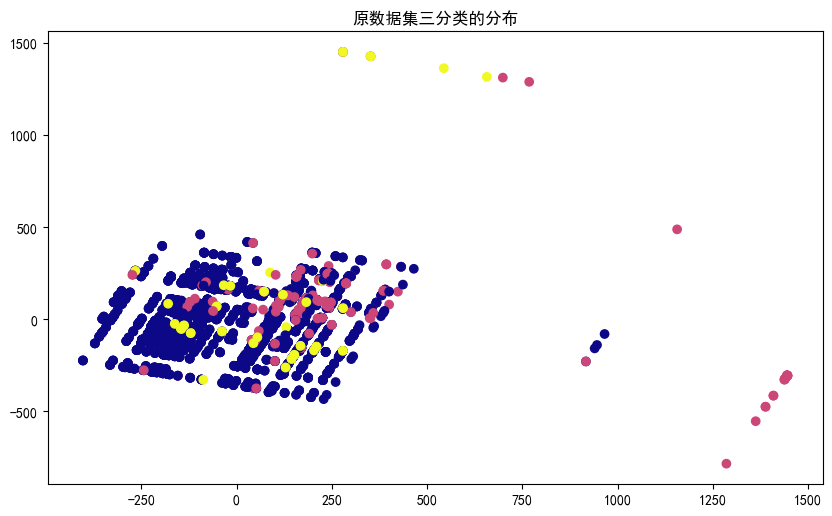

In [93]:
# 降维，准备提取outlier
PCA_2d = PCA(n_components=2)
x_PCA = PCA_2d.fit_transform(x)
plot_embedding_2d(x_PCA[:, 0], x_PCA[:, 1], y, "原数据集三分类的分布")

In [94]:
# 查看偏度、峰度
pd.DataFrame([i for i in zip(range(df_original.shape[1]), df_original.skew(), df_original.kurt())], columns=['特征', '偏度', '峰度'])

,特征,偏度,峰度
0,0,-4.609221,19.256986
1,1,-2.902408,6.428000
2,2,-0.740612,-1.452404
3,3,3.504563,10.288411
4,4,0.000000,0.000000
...,...,...,...
4802,4802,-0.311210,-1.103204
4803,4803,1.482587,8.288838
4804,4804,0.005615,-0.532641
4805,4805,0.028363,-0.024201


2.用pca降维之后，使用KMeans算法对降维后的数据进行聚类，使用silhouette_score方法对聚类进行评分，并作图以查看各类数据的分布情况

In [ ]:
x_standard = pd.DataFrame(StandardScaler().fit_transform(x.values))
x_PCA_standard = pd.DataFrame(PCA_2d.fit_transform(x_standard))

kmeans = KMeans(n_clusters=3, random_state=0).fit(x_PCA_standard)

plot_embedding_2d(x_PCA_standard.iloc[:, 0], x_PCA_standard.iloc[:, 1], kmeans.labels_, "KMeans的三分类分布")

# 获取silhouette_score
kmeans = KMeans(n_clusters=3, random_state=0)	
# 根据数据data进行聚类，结果存放于result_list中
result_list = kmeans.fit_predict(x_PCA_standard)
silhouette_score(x_PCA_standard, result_list)

# 获取adjusted_rand_score
# adjusted_rand_score(y, result_list)

3.计算每一类簇的中心位置，并计算各类的点到其簇中心点的距离

In [96]:
x_PCA_standard['label'] = kmeans.labels_

relative_distance = []
for i in range(3):  # 逐一处理
    distance = x_PCA_standard.query("label == @i")[[0, 1]] - kmeans.cluster_centers_[i]  # 计算各点至簇中心点的距离
    absolute_distance = distance.apply(np.linalg.norm, axis = 1)  # 求出绝对距离
    relative_distance.append(absolute_distance / absolute_distance.median())  # 求相对距离并添加
    
x_PCA_standard['relative_distance'] = pd.concat(relative_distance)  # 合并


4.定义距离超过2的为离群点，将所有离群点找出

In [97]:
distance_scale = 2
x_PCA_standard['outlier'] = x_PCA_standard.relative_distance.apply(lambda x: 1 if x > distance_scale else 0)
x_PCA_standard[x_PCA_standard['outlier'] == 1]


,0,1,label,relative_distance,outlier
4,-2.204473,-5.957331,1,2.037219,1
12,5.552363,-4.148582,1,2.349107,1
42,-2.894105,-22.192122,1,2.172468,1
57,-2.538032,-21.775383,1,2.050535,1
59,-1.009756,-24.592681,1,2.505352,1
...,...,...,...,...,...
3175,-3.705688,46.629816,2,4.048799,1
3176,-3.216037,47.368461,2,4.125106,1
3177,-3.928084,46.832725,2,4.067540,1
3178,-3.490572,48.603048,2,4.245224,1


作图显示离群点分布情况

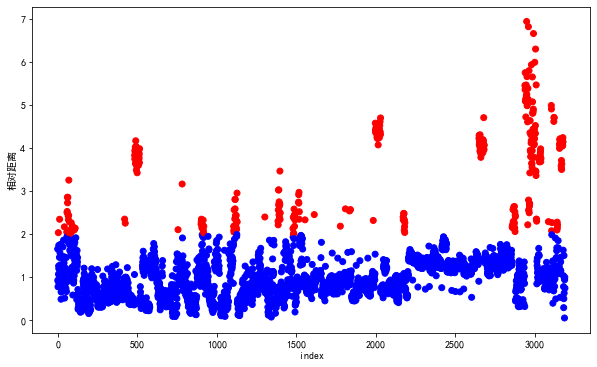

In [98]:
fig, ax = plt.subplots(figsize=(10, 6))
colors = { 0: 'blue', 1: 'red' }
ax.scatter(x_PCA_standard.index, x_PCA_standard.relative_distance, c=x_PCA_standard.outlier.apply(lambda x: colors[x]))
ax.set_xlabel('index')
ax.set_ylabel('相对距离')
plt.show()


5.提取出离群点

In [99]:
outlier_index = x_PCA_standard[x_PCA_standard['outlier'] == 1].index
df_outlier = df_original.iloc[outlier_index, :]
df_outlier

,0,1,2,3,4,5,6,7,8,9,...,4797,4798,4799,4800,4801,4802,4803,4804,4805,4806
4,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.246470,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.068140,1
12,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.246470,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.068140,0
42,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.246470,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.068140,0
57,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.246470,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.068140,0
59,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.144204,0.210953,0.246470,-0.212117,-0.134972,0.121756,0.118738,-0.107353,-0.068140,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3175,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.206757,-0.141040,0.084604,-0.075464,-0.266440,0.310790,0.293963,-0.163698,0.009452,1
3176,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.206757,-0.141040,0.084604,-0.075464,-0.266440,0.310790,0.293963,-0.163698,0.009452,1
3177,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.206757,-0.141040,0.084604,-0.075464,-0.266440,0.310790,0.293963,-0.163698,0.009452,1
3178,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.206757,-0.141040,0.084604,-0.075464,-0.266440,0.310790,0.293963,-0.163698,0.009452,1


In [100]:
df_outlier.iloc[:, -1].value_counts()

0    284
1     46
2     16
Name: 4806, dtype: int64

6.将上述过程封装成一个离群点提取函数，在十折交叉验证函数中准备对训练集和测试集进行离群点提取

In [101]:
def outlier_extract(df, distance_scale=1.5):
    x = df.iloc[:, :-1]
    y = df.iloc[:, -1]

    PCA_2d = PCA(n_components=2)
    df_index = df.index

    x_standard = pd.DataFrame(StandardScaler().fit_transform(x.values))
    x_standard.index = df_index
    # print(train_X_standard.index)
    x_PCA_standard = pd.DataFrame(PCA_2d.fit_transform(x_standard))
    x_PCA_standard.index = df_index

    kmeans = KMeans(n_clusters=3, random_state=0).fit(x_PCA_standard)

    x_PCA_standard['label'] = kmeans.labels_
    relative_distance = []

    for i in range(3):  # 逐一处理
        distance = x_PCA_standard.query("label == @i")[[0, 1]] - kmeans.cluster_centers_[i]  # 计算各点至簇中心点的距离
        absolute_distance = distance.apply(np.linalg.norm, axis = 1)  # 求出绝对距离
        relative_distance.append(absolute_distance / absolute_distance.median())  # 求相对距离并添加
        
    x_PCA_standard['relative_distance'] = pd.concat(relative_distance)  # 合并
    # print(train_X_PCA_standard)
    x_PCA_standard['outlier'] = x_PCA_standard.relative_distance.apply(lambda x: 1 if x > distance_scale else 0)

    x_outlier_index = x_PCA_standard[x_PCA_standard['outlier'] == 1].index
    df_without_outlier = df.loc[list(set(df.index) - set(x_outlier_index)), :]
    df_outlier = df.loc[x_outlier_index, :]

    return df_without_outlier, df_outlier

7.定义离群点分离十折交叉函数，其就是在原十折交叉验证函数的基础上对训练集和测试集进行离群点分离，用离群点训练一个模型，用非离群点训练另一个模型，把测试集中的离群点用前者进行预测，非离群点用后者进行预测，合并结果

In [102]:
def outlier_cross_validate_score(estimator, X, y, cv = 5, mean = False):
    kf = model_selection.StratifiedKFold(n_splits=cv)
    #存储k次训练中得到的模型与其对应的分数
    res = dict()
    accuracy = []
    f1_score = []
    # auc = []
    recall_0 = []
    recall_1 = []
    recall_2 = []
    precision_0 = []
    precision_1 = []
    precision_2 = []

    it = 1 
    #进行k次训练
    for train_index, test_index in kf.split(X, y):
        # print('train_index', train_index, 'test_index', test_index)
        train_X, train_y = X.iloc[train_index], y.iloc[train_index]
        test_X, test_y = X.iloc[test_index], y.iloc[test_index]

        df_train = pd.concat([train_X, train_y], axis=1)  # 9
        df_train_without_outlier, df_train_outlier = outlier_extract(df_train)
        train_X_without_outlier = df_train_without_outlier.iloc[:, :-1]
        train_y_without_outlier = df_train_without_outlier.iloc[:, -1]
        train_X_outlier = df_train_outlier.iloc[:, :-1]
        train_y_outlier = df_train_outlier.iloc[:, -1]

        df_test = pd.concat([test_X, test_y], axis=1)  # 9
        df_test_without_outlier, df_test_outlier = outlier_extract(df_test)
        test_X_without_outlier = df_test_without_outlier.iloc[:, :-1]
        test_y_without_outlier = df_test_without_outlier.iloc[:, -1]
        test_X_outlier = df_test_outlier.iloc[:, :-1]
        test_y_outlier = df_test_outlier.iloc[:, -1]

        test_without_outlier_index = df_test_without_outlier.index
        test_outlier_index = df_test_outlier.index

        clf_without_outlier = None
        clf_outlier = None

        if isinstance(estimator, DecisionTreeClassifier):
            clf_without_outlier = DecisionTreeClassifier()
            clf_outlier = DecisionTreeClassifier()
        if isinstance(estimator, RandomForestClassifier):
            clf_without_outlier = RandomForestClassifier()
            clf_outlier = RandomForestClassifier()
        if isinstance(estimator, ExtraTreesClassifier):
            clf_without_outlier = ExtraTreesClassifier()
            clf_outlier = ExtraTreesClassifier()
        if isinstance(estimator, GradientBoostingClassifier):
            clf_without_outlier = GradientBoostingClassifier()
            clf_outlier = GradientBoostingClassifier()
        if isinstance(estimator, XGBClassifier):
            clf_without_outlier = XGBClassifier()
            clf_outlier = XGBClassifier()
        if isinstance(estimator, SVC):
            clf_without_outlier = SVC(probability=True)
            clf_outlier = SVC(probability=True)
        if isinstance(estimator, LinearSVC):
            clf_without_outlier = LinearSVC()
            clf_outlier = LinearSVC()
        if isinstance(estimator, KNeighborsClassifier):
            clf_without_outlier = KNeighborsClassifier()
            clf_outlier = KNeighborsClassifier()
        
        clf_without_outlier.fit(train_X_without_outlier, train_y_without_outlier)
        clf_outlier.fit(train_X_outlier, train_y_outlier)

        clf_predict_without_outlier = pd.DataFrame(clf_without_outlier.predict(test_X_without_outlier))
        clf_predict_outlier = pd.DataFrame(clf_outlier.predict(test_X_outlier))

        clf_predict_without_outlier.index = test_without_outlier_index
        clf_predict_outlier.index = test_outlier_index

        clf_predict = pd.concat([clf_predict_without_outlier, clf_predict_outlier])
        test_y = pd.concat([test_y_without_outlier, test_y_outlier])

        report = metrics.classification_report(test_y, clf_predict, output_dict=True)

        accuracy.append(report['accuracy'])
        f1_score.append(report['macro avg']['f1-score'])
        recall_0.append(report['0']['recall'])
        recall_1.append(report['1']['recall'])
        recall_2.append(report['2']['recall'])
        precision_0.append(report['0']['precision'])
        precision_1.append(report['1']['precision'])
        precision_2.append(report['2']['precision'])

        print("iteration", it, ".....")
        it += 1
        res['accuracy'] = accuracy
        res['f1_score'] = f1_score
        # res['auc'] = 0
        res['recall_0'] = recall_0
        res['recall_1'] = recall_1
        res['recall_2'] = recall_2
        res['precision_0'] = precision_0
        res['precision_1'] = precision_1
        res['precision_2'] = precision_2
        
    if mean:
        for key in res.keys():
            res[key] = np.mean(res[key])
    return res

8.训练模型并查看结果

In [103]:
# outlier
for clf, name in zip(clfs, names):
    # if name in ['random_forest', 'extra_trees', 'GBDT', 'XGB', 'SVC', 'LinearSVC', 'KNN']:
    #     continue    
    res = outlier_cross_validate_score(clf, x, y, mean=True, cv=10)
    print(name)
    print(res)

iteration 1 .....
iteration 2 .....
iteration 3 .....
iteration 4 .....
iteration 5 .....
iteration 6 .....
iteration 7 .....
iteration 8 .....
iteration 9 .....
iteration 10 .....
decision_tree
{'accuracy': 0.6650558385579938, 'f1_score': 0.3408360869341297, 'recall_0': 0.7104743367935409, 'recall_1': 0.275, 'recall_2': 0.1572727272727273, 'precision_0': 0.9063468679685739, 'precision_1': 0.12234934921756227, 'precision_2': 0.0537468671679198}
iteration 1 .....
iteration 2 .....
iteration 3 .....
iteration 4 .....
iteration 5 .....
iteration 6 .....
iteration 7 .....
iteration 8 .....
iteration 9 .....
iteration 10 .....
random_forest
{'accuracy': 0.7872560736677117, 'f1_score': 0.3390823108136297, 'recall_0': 0.8607086216839678, 'recall_1': 0.09, 'recall_2': 0.08818181818181818, 'precision_0': 0.9031694465202756, 'precision_1': 0.05505211920833908, 'precision_2': 0.08944444444444444}
iteration 1 .....
iteration 2 .....
iteration 3 .....
iteration 4 .....
iteration 5 .....
iteration 6

#### 五、对数据集进行重采样方法处理
1.封装DataFrame自带的sample函数

In [104]:
# 定义采样函数
def sample(df, multiple=0.5):
    # 创建一个数据结构和之前一致，但空的dataframe
    sample_data = df.copy(deep=True)

    return sample_data.sample(frac=multiple, replace=True)

2.使用上文提到的定义基线和重采样的函数，将sampled设置为true，即可进行重采样操作后训练模型并预测

In [105]:
# sampled
for clf, name in zip(clfs, names):
    # if name in ['random_forest', 'extra_trees', 'GBDT', 'XGB', 'SVC', 'LinearSVC', 'KNN']:
    #     continue    
    res = my_cross_validate_score(clf, x, y, mean=True, cv=10, sampled=True)
    print(name)
    print(res)

decision_tree
{'accuracy': 0.6857533307210031, 'f1_score': 0.3943061796725999, 'auc': 0.6100133251893597, 'recall_0': 0.7191765186466743, 'recall_1': 0.3350000000000001, 'recall_2': 0.43090909090909096, 'precision_0': 0.9252241006085832, 'precision_1': 0.12215177975876937, 'precision_2': 0.13645009146594284}
random_forest
{'accuracy': 0.8169954937304075, 'f1_score': 0.4444576860117027, 'auc': 0.6530695352272671, 'recall_0': 0.8742454825067281, 'recall_1': 0.255, 'recall_2': 0.3081818181818182, 'precision_0': 0.9215472274418228, 'precision_1': 0.21946433674684443, 'precision_2': 0.2240668945372053}
extra_trees
{'accuracy': 0.8408140673981193, 'f1_score': 0.47811328779102935, 'auc': 0.6671279662946232, 'recall_0': 0.8967680699730873, 'recall_1': 0.29500000000000004, 'recall_2': 0.3372727272727273, 'precision_0': 0.9276309378935178, 'precision_1': 0.24379480643661786, 'precision_2': 0.29079299110948725}
GBDT
{'accuracy': 0.7129516065830721, 'f1_score': 0.4013230593799655, 'auc': 0.6379310

#### 六、对数据集进行特征抽取处理
1.查看SelectFromModel默认给出的threshold参数值

In [106]:
# 查看默认threshold，是所有特征重要性的平均值
selector = SelectFromModel(estimator=DecisionTreeClassifier()).fit(x, y)
selector.threshold_

0.00020807324178110696

2.根据其默认的threshold参数值，选取合适的参数查找范围和查找步长。设定参数范围为0-0.08，步长为0.0001，针对**决策树**模型进行相应参数下的特征抽取，并训练评分

In [107]:
'''
    使用SelectFromModel进行特征选择
    寻找最佳参数threshold
'''
# select
# for i in np.arange(0, 0.08, 0.0001):
#     selector = SelectFromModel(estimator=DecisionTreeClassifier(), threshold=i).fit(x, y)

#     x_selected = pd.DataFrame(selector.transform(x))
#     for clf, name in zip(clfs, names):
#         if name in ['random_forest', 'extra_trees', 'GBDT', 'XGB', 'SVC', 'LinearSVC', 'KNN']:
#             continue    
#         if x_selected.empty:
#             continue
#         res = my_cross_validate_score(clf, x_selected, y, mean=True, cv=10, sampled=False)
#         print(i)
#         print(res)

'\n    使用SelectFromModel进行特征选择\n    寻找最佳参数threshold\n'

3.绘制出threshold-scores折线图，重点关注recall1和recall2的值

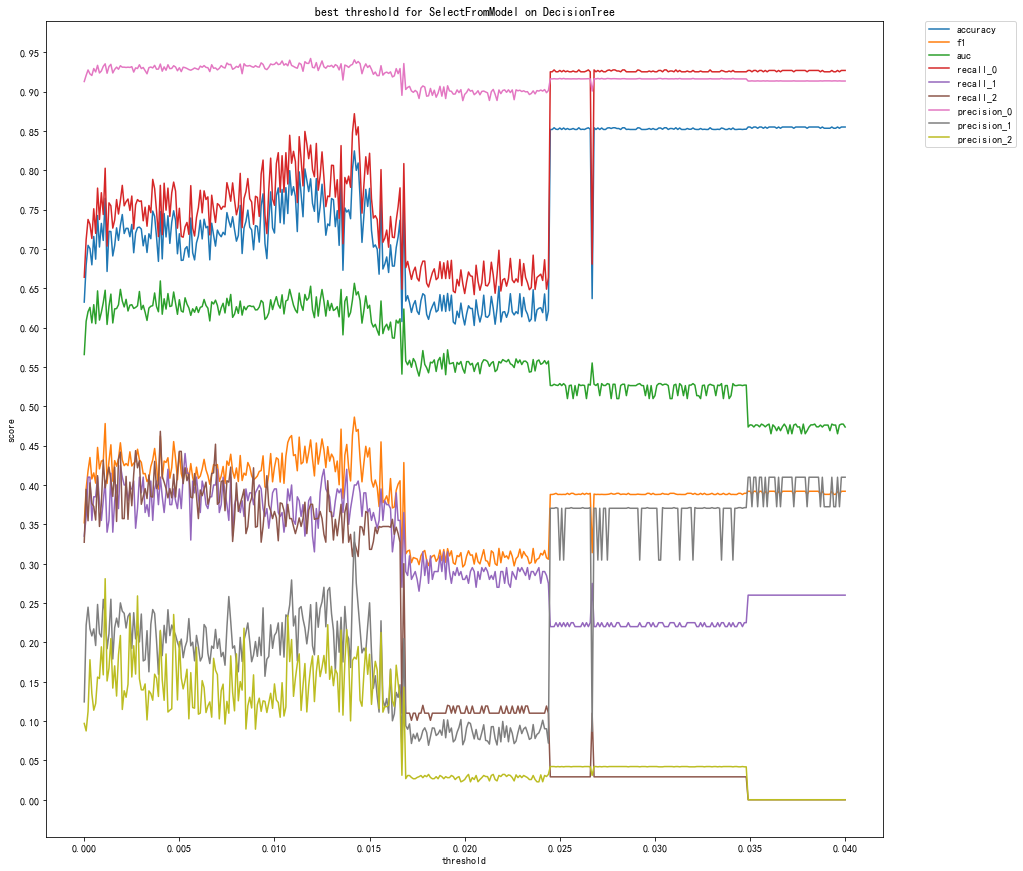

In [108]:
threshold_list = []
res_pd = pd.DataFrame(columns=['accuracy', 'f1_score', 'auc', 'recall_0', 'recall_1', 'recall_2',
       'precision_0', 'precision_1', 'precision_2'])

with open('score.txt', 'r') as f:
    for i in f.readlines():
        if (i.startswith('{') == False):
            threshold_list.append(float(i))
            continue
        else:
            tmp = eval(i)
            res_pd = pd.concat([res_pd, pd.DataFrame(tmp, index=[0])], axis=0)
res_pd.reset_index(inplace=True)
res_pd['index'] = threshold_list
res_pd.rename(columns={'index' : 'threshold'}, inplace=True)
# res_pd
plt.figure(figsize=(15,15))
plt.plot(threshold_list, res_pd['accuracy'], label='accuracy')
plt.plot(threshold_list, res_pd['f1_score'], label='f1')
plt.plot(threshold_list, res_pd['auc'], label='auc')
plt.plot(threshold_list, res_pd['recall_0'], label='recall_0')
plt.plot(threshold_list, res_pd['recall_1'], label='recall_1')
plt.plot(threshold_list, res_pd['recall_2'], label='recall_2')
plt.plot(threshold_list, res_pd['precision_0'], label='precision_0')
plt.plot(threshold_list, res_pd['precision_1'], label='precision_1')
plt.plot(threshold_list, res_pd['precision_2'], label='precision_2')

plt.xlabel("threshold")
plt.ylabel('score')
plt.yticks(np.arange(0.0, 1, 0.05))
plt.legend(loc=2,bbox_to_anchor=(1.05,1.0),borderaxespad = 0.)
plt.title('best threshold for SelectFromModel on DecisionTree')
plt.show()

4.选择最优的threshold=0.004（recall1值最高）进行特征抽取，将抽取后的数据用八个分类器分别进行训练预测。

In [114]:
# 选择最优的threshold=0.004
# selected
selector = SelectFromModel(estimator=DecisionTreeClassifier(), threshold=0.004).fit(x, y)

x_selected = pd.DataFrame(selector.transform(x))
for clf, name in zip(clfs, names):
    # if name in ['random_forest', 'extra_trees', 'GBDT', 'XGB', 'SVC', 'LinearSVC', 'KNN']:
    #     continue    
    if x_selected.empty:
        continue
    res = my_cross_validate_score(clf, x_selected, y, mean=True, cv=10, sampled=False)
    print(name)
    print(res)

decision_tree
{'accuracy': 0.7245748432601881, 'f1_score': 0.43889393426695616, 'auc': 0.6457719867669993, 'recall_0': 0.7558258842752787, 'recall_1': 0.425, 'recall_2': 0.4281818181818181, 'precision_0': 0.9344965276710736, 'precision_1': 0.2411648717383333, 'precision_2': 0.1455717107573244}
random_forest
{'accuracy': 0.8261206896551723, 'f1_score': 0.4619175128190047, 'auc': 0.6686744416266805, 'recall_0': 0.880102604767397, 'recall_1': 0.31499999999999995, 'recall_2': 0.30818181818181817, 'precision_0': 0.931041419049626, 'precision_1': 0.34831767932947605, 'precision_2': 0.22922254524402827}
extra_trees
{'accuracy': 0.8480515282131661, 'f1_score': 0.4870689382033052, 'auc': 0.6544596477984582, 'recall_0': 0.9029772202998847, 'recall_1': 0.335, 'recall_2': 0.30818181818181817, 'precision_0': 0.9337848677804313, 'precision_1': 0.4747785547785549, 'precision_2': 0.20529430247172184}
GBDT
{'accuracy': 0.8132631269592476, 'f1_score': 0.44901606409697925, 'auc': 0.6693631946530509, 'rec

#### 七、对数据进行标签二值化处理
1.定义二值化函数，将1、2类统一处理为3类，与0类合并，成为一个二分类数据

In [110]:
def binary_label(df):
    df_label_0 = df[df[4806] == 0]
    df_label_1 = df[df[4806] == 1]
    df_label_2 = df[df[4806] == 2]
    df_label_1_and_2 = pd.concat([df_label_1, df_label_2])

    # 1类和2类统一标位3类，与0类组合为二分类，进行识别
    df_label_0_and_3 = df.copy(deep=True)
    index_label_1_and_2 = df_label_0_and_3[df_label_0_and_3[4806] != 0].index
    df_label_0_and_3.loc[index_label_1_and_2, 4806] = 3

    return df_label_1_and_2, df_label_0_and_3

2.定义交叉函数验证，其难点在于对于3类数据要训练并预测两次（0/3分类一次，1/2分类一次），最后将预测后的结果做整理，然后带入到classification_report函数生成报告

In [120]:
# K折交叉验证函数（binary）定义
def binary_cross_validate_score(estimator, X, y, cv = 5, mean = False):
    kf = model_selection.StratifiedKFold(n_splits=cv)
    #存储k次训练中得到的模型与其对应的分数
    res = dict()
    accuracy = []
    f1_score = []
    auc = []
    recall_0 = []
    recall_1 = []
    recall_2 = []
    precision_0 = []
    precision_1 = []
    precision_2 = []

    it = 1 
    #进行k次训练
    for train_index, test_index in kf.split(X, y):
        # print('train_index', train_index, 'test_index', test_index)
        train_X, train_y = X.iloc[train_index], y.iloc[train_index]
        test_X, test_y = X.iloc[test_index], y.iloc[test_index]

        df_train = pd.concat([train_X, train_y], axis=1)
        df_train_1_and_2, df_train_0_and_3 = binary_label(df_train)
        train_X_1_and_2 = df_train_1_and_2.iloc[:, :-1]
        train_y_1_and_2 = df_train_1_and_2.iloc[:, -1]
        train_X_0_and_3 = df_train_0_and_3.iloc[:, :-1]
        train_y_0_and_3 = df_train_0_and_3.iloc[:, -1]

        clf_1_2 = None
        clf_0_3 = None

        if isinstance(estimator, DecisionTreeClassifier):
            clf_1_2 = DecisionTreeClassifier()
            clf_0_3 = DecisionTreeClassifier()
        if isinstance(estimator, RandomForestClassifier):
            clf_1_2 = RandomForestClassifier()
            clf_0_3 = RandomForestClassifier()
        if isinstance(estimator, ExtraTreesClassifier):
            clf_1_2 = ExtraTreesClassifier()
            clf_0_3 = ExtraTreesClassifier()
        if isinstance(estimator, GradientBoostingClassifier):
            clf_1_2 = GradientBoostingClassifier()
            clf_0_3 = GradientBoostingClassifier()
        if isinstance(estimator, XGBClassifier):
            clf_1_2 = XGBClassifier()
            clf_0_3 = XGBClassifier()
        if isinstance(estimator, SVC):
            clf_1_2 = SVC(probability=True)
            clf_0_3 = SVC(probability=True)
        if isinstance(estimator, LinearSVC):
            clf_1_2 = LinearSVC()
            clf_0_3 = LinearSVC()
        if isinstance(estimator, KNeighborsClassifier):
            clf_1_2 = KNeighborsClassifier()
            clf_0_3 = KNeighborsClassifier()

        clf_0_3.fit(train_X_0_and_3, train_y_0_and_3)
        clf_1_2.fit(train_X_1_and_2, train_y_1_and_2)
        
        df_test = pd.concat([test_X, test_y], axis=1)
        test_index = df_test.index
        clf_predict_0_3 = pd.DataFrame(clf_0_3.predict(test_X))
        clf_predict_0_3.index = test_index

        clf_predict_0 = clf_predict_0_3[clf_predict_0_3[0] == 0]
        predict_0_index = clf_predict_0.index  # 预测为0的索引

        # print(predict_0_index)
        # print(test_y.index)
        
        test_y_0 = test_y.loc[predict_0_index]  # 在真实值中找到预测为0的索引的位置
        clf_predict_3 = clf_predict_0_3[clf_predict_0_3[0] == 3]
        predict_3_index = clf_predict_3.index  # 预测为3的索引

        if not predict_3_index.empty:
            test_X_1_and_2 = test_X.loc[predict_3_index, :]
            test_y_1_and_2 = test_y.loc[predict_3_index]  # 在真实值中找到预测为3的索引的位置

            clf_predict_1_2 = pd.DataFrame(clf_1_2.predict(test_X_1_and_2))
            clf_predict_1_2.index = predict_3_index

            clf_predict = pd.concat([clf_predict_0, clf_predict_1_2])
            test_y = pd.concat([test_y_0, test_y_1_and_2])

        else:
            clf_predict = clf_predict_0
            test_y = test_y_0

        report = metrics.classification_report(test_y, clf_predict, output_dict=True)

        # if isinstance(estimator, LinearSVC):
        #     score = estimator.decision_function(test_X)
        #     test_y_hot = label_binarize(test_y, classes=(0, 1, 2))
        #     fpr, tpr, _ = metrics.roc_curve(test_y_hot.ravel(), score.ravel())
        #     auc.append(metrics.auc(fpr, tpr))
            
        # else:
        #     _, _, _, _, _, auc_avg = calculate_auc(estimator, test_X, test_y)
        #     auc.append(auc_avg)

        
        accuracy.append(report['accuracy'])
        f1_score.append(report['macro avg']['f1-score'])
        recall_0.append(report['0']['recall'])
        recall_1.append(report['1']['recall'])
        recall_2.append(report['2']['recall'])
        precision_0.append(report['0']['precision'])
        precision_1.append(report['1']['precision'])
        precision_2.append(report['2']['precision'])

        print("iteration", it, ".....")
        it += 1
        res['accuracy'] = accuracy
        res['f1_score'] = f1_score
        res['auc'] = 0
        res['recall_0'] = recall_0
        res['recall_1'] = recall_1
        res['recall_2'] = recall_2
        res['precision_0'] = precision_0
        res['precision_1'] = precision_1
        res['precision_2'] = precision_2
        
    if mean:
        for key in res.keys():
            res[key] = np.mean(res[key])
    return res

3.开始训练、预测

In [121]:
# binary
for clf, name in zip(clfs, names):
    # if name in ['decision_tree', 'random_forest', 'extra_trees', 'GBDT']:
    #     continue    
    res = binary_cross_validate_score(clf, x, y, mean=True, cv=10)
    print(name)
    print(res)

[20:37:33] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:42] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
iteration 1 .....
[20:37:44] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:37:53] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to 

#### 八、获取所有处理下所有模型的各种评分，绘制柱状图（效果不好，仅做参考）
1.将之前所有的评分手动录入到几个txt文件中并让其读取

In [165]:
classifier_list = ['decision_tree', 'random_forest', 'extra_trees', 'GBDT', 'XGB', 'SVC', 'LinearSVC', 'KNN']
score_list = ['baseline', 'outlier', 'sampled', 'selected', 'binary']
# score_list = ['baseline']

result_pd_list = []

for name in score_list:
    res_pd = pd.DataFrame(columns=['accuracy', 'f1_score', 'auc', 'recall_0', 'recall_1', 'recall_2',
       'precision_0', 'precision_1', 'precision_2'])
    with open(name + '.txt', 'r') as f:
        for i in f.readlines():
            if (i.startswith('{') == True):
                tmp = eval(i)
                # print(pd.DataFrame(tmp, index=[0]))
                res_pd = pd.concat([res_pd, pd.DataFrame(tmp, index=[0])], axis=0)
    res_pd.reset_index(inplace=True)
    res_pd['index'] = classifier_list
    res_pd.rename(columns={'index' : 'classifier'}, inplace=True)
    
    result_pd_list.append(res_pd)

result_pd_list[4]

,classifier,accuracy,f1_score,auc,recall_0,recall_1,recall_2,precision_0,precision_1,precision_2
0,decision_tree,0.625573,0.351936,0.0,0.653979,0.345,0.373636,0.917448,0.106677,0.093969
1,random_forest,0.752149,0.418177,0.0,0.795933,0.335,0.337273,0.923583,0.209158,0.124503
2,extra_trees,0.733944,0.409505,0.0,0.776533,0.33,0.328182,0.921167,0.295385,0.129877
3,GBDT,0.746487,0.373574,0.0,0.800763,0.235,0.219091,0.914319,0.146725,0.090205
4,XGB,0.793172,0.404378,0.0,0.853746,0.16,0.327273,0.912892,0.151028,0.180071
5,SVC,0.910092,0.365588,0.0,0.998611,0.095,0.02,0.913182,0.15,0.04
6,LinearSVC,0.63303,0.312332,0.0,0.672139,0.31,0.171818,0.89896,0.082434,0.049326
7,KNN,0.911343,0.518832,0.0,0.978514,0.35,0.124545,0.931118,0.69377,0.35


2.定义自动标注函数

In [154]:
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2.-0.09, 1.01 * height, '%s' % round(float(height), 4))

3.定义绘图函数

In [158]:
def draw_result(accuracy_df, name):
    plt.clf()
    plt.figure(figsize=(15, 15))
    ax=plt.axes()

    parameter_list = accuracy_df['classifier']
    accuracy_list = accuracy_df['accuracy']
    f1_score_list = accuracy_df['f1_score']
    auc_list = accuracy_df['auc']
    recall_0_list = accuracy_df['recall_0']
    recall_1_list = accuracy_df['recall_1']
    recall_2_list = accuracy_df['recall_2']
    precision_0_list = accuracy_df['precision_0']
    precision_1_list = accuracy_df['precision_1']
    precision_2_list = accuracy_df['precision_2']

    bar_width = 0.1
    autolabel(ax.bar(parameter_list, accuracy_list, label='accuracy', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width, f1_score_list, label='f1_score', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width * 2, auc_list, label='auc', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width * 3, recall_0_list, label='recall_0', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width * 4, recall_1_list, label='recall_1', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width * 5, recall_2_list, label='recall_2', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width * 6, precision_0_list, label='precision_0', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width * 7, precision_1_list, label='precision_1', width=bar_width, align='center'))
    autolabel(ax.bar(np.arange(4) + bar_width * 8, precision_2_list, label='precision_2', width=bar_width, align='center'))
    ax.set_title(name)
    ax.set_xticks(parameter_list)
    ax.set_yticks(np.arange(0, 1, 0.05))
    ax.set_xlabel('parameters')
    ax.set_ylabel('Evaluate score')
    ax.grid(axis='y', linewidth=1)
    ax.legend(loc=2, bbox_to_anchor=(1.05, 1.0),borderaxespad = 0.)
    plt.show()


4.开始绘图

<Figure size 432x288 with 0 Axes>

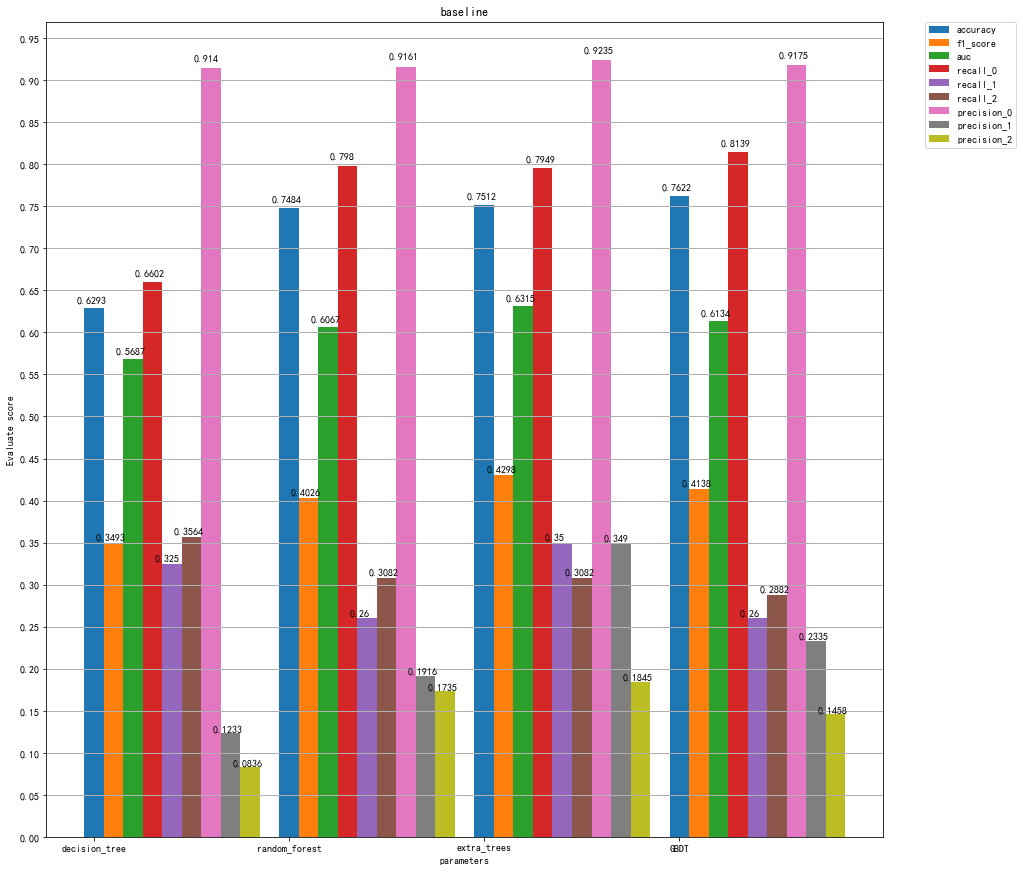

<Figure size 432x288 with 0 Axes>

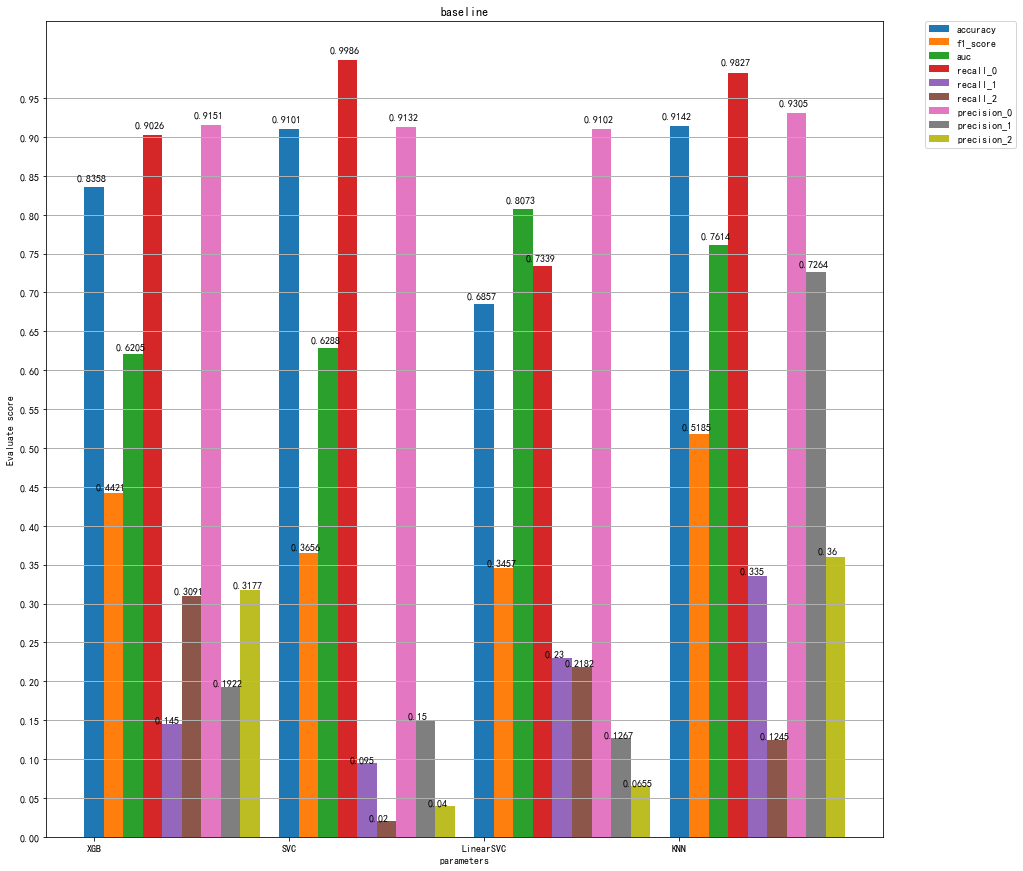

<Figure size 432x288 with 0 Axes>

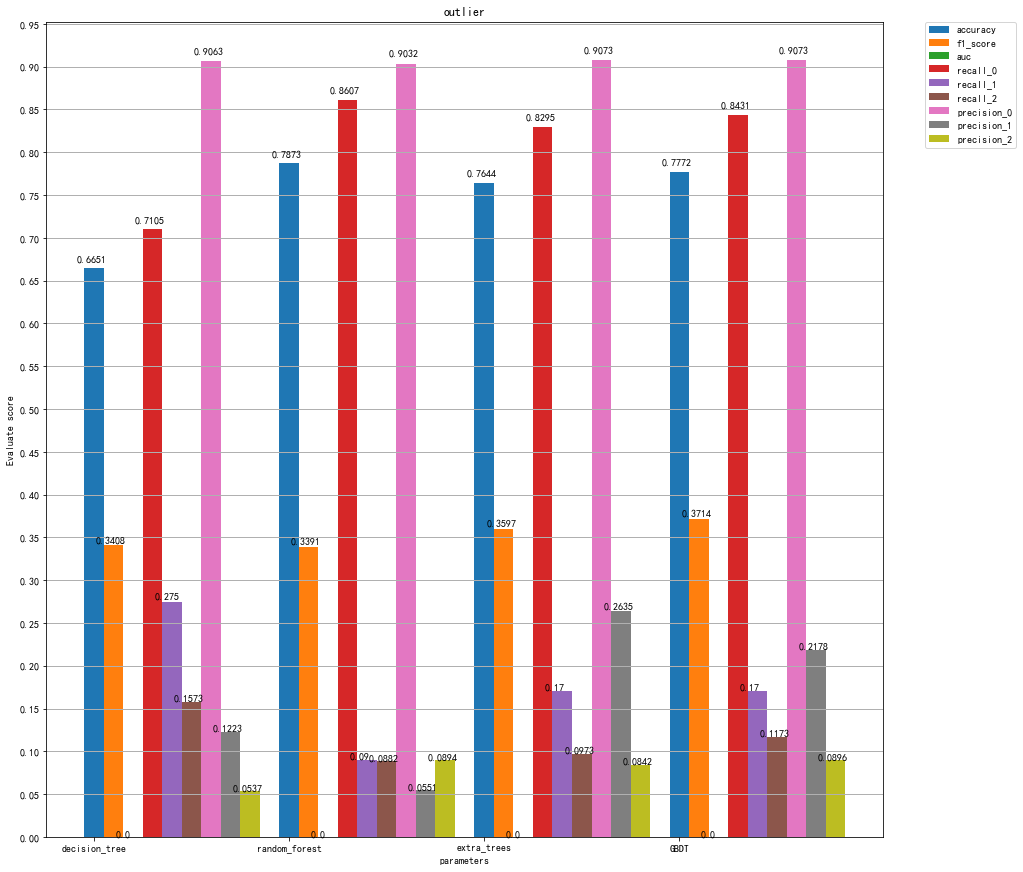

<Figure size 432x288 with 0 Axes>

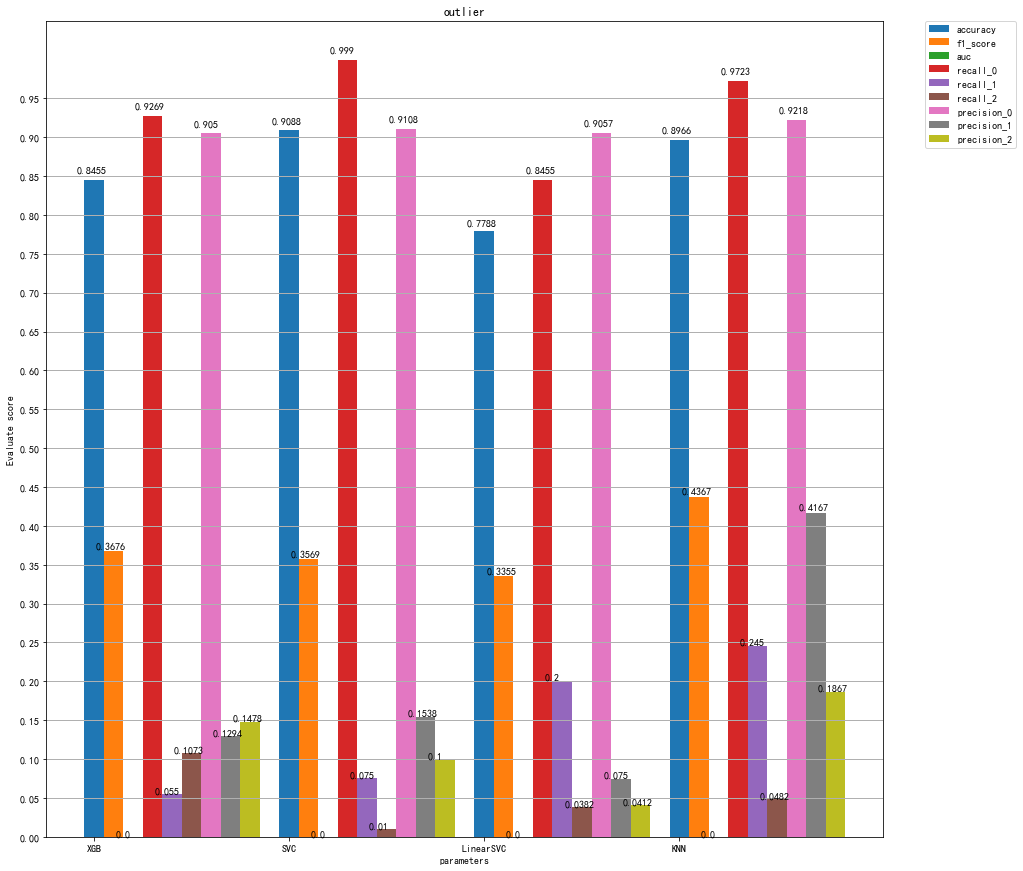

<Figure size 432x288 with 0 Axes>

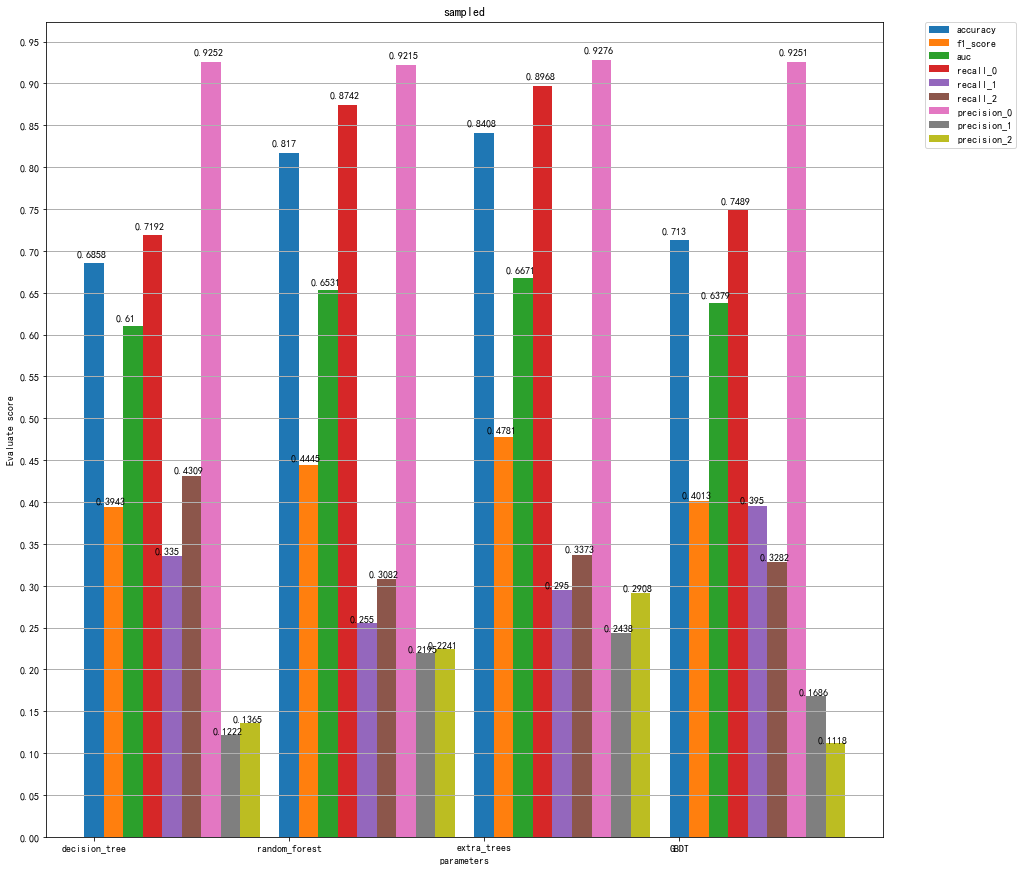

<Figure size 432x288 with 0 Axes>

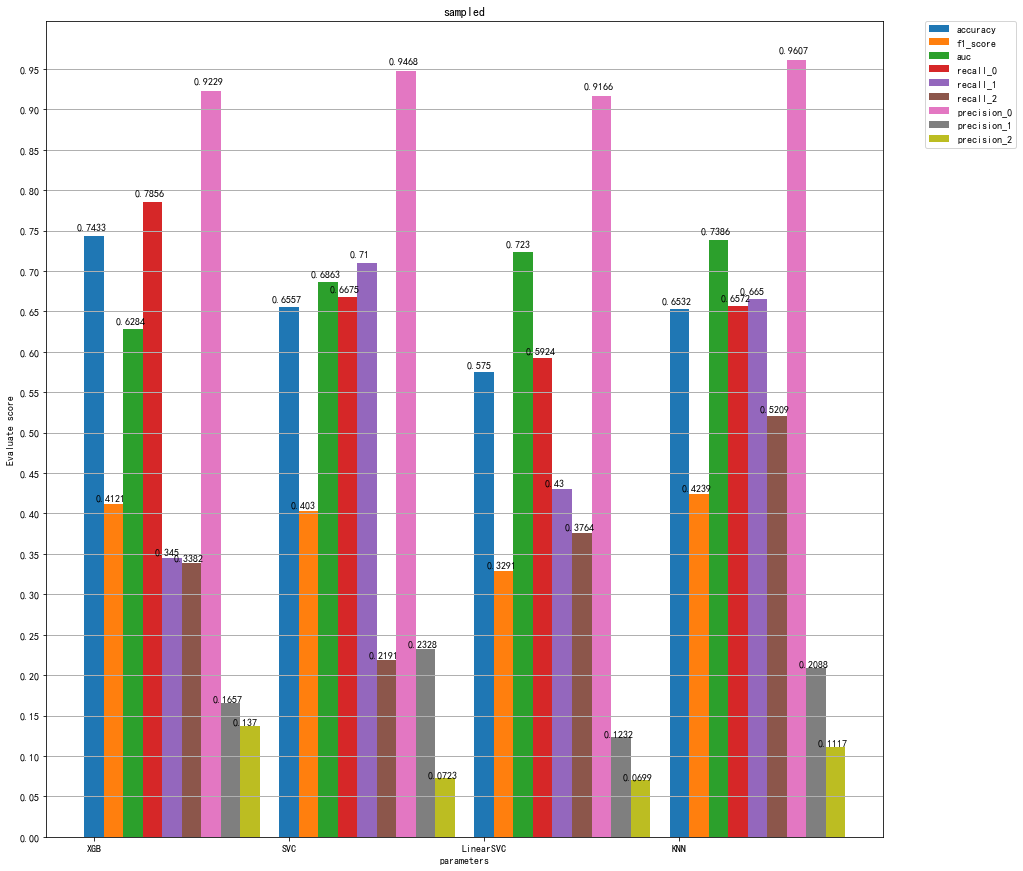

<Figure size 432x288 with 0 Axes>

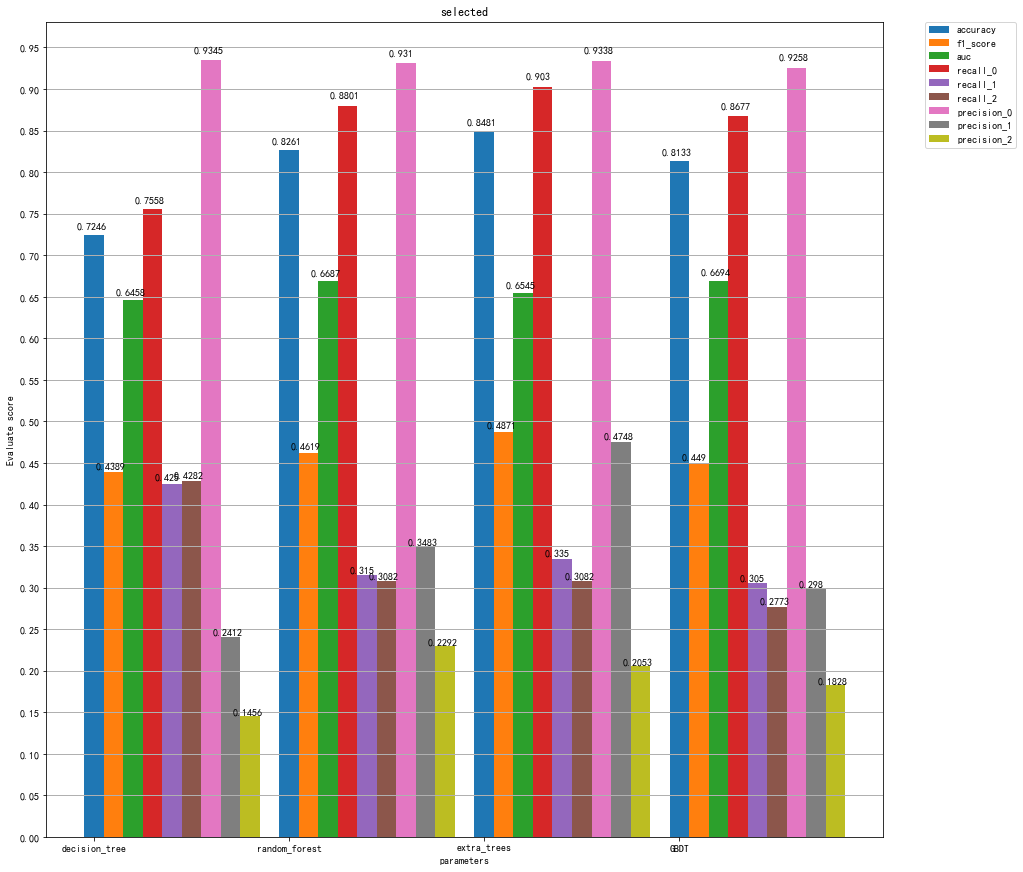

<Figure size 432x288 with 0 Axes>

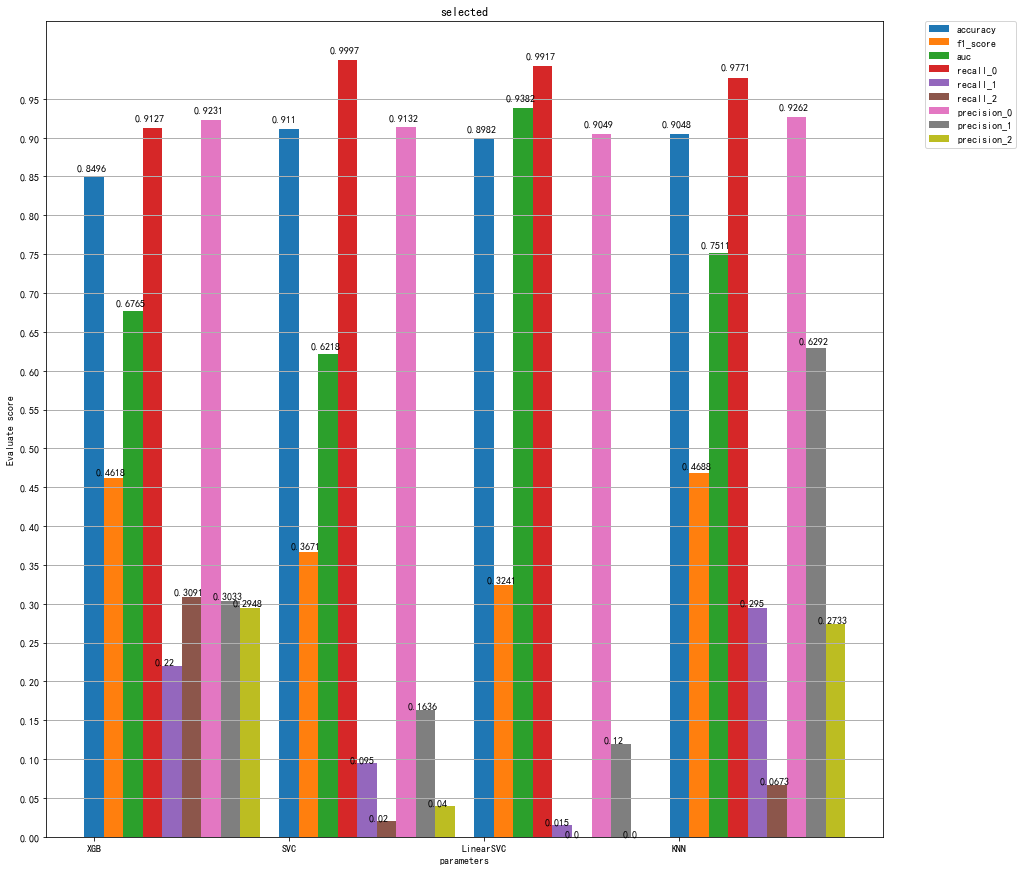

<Figure size 432x288 with 0 Axes>

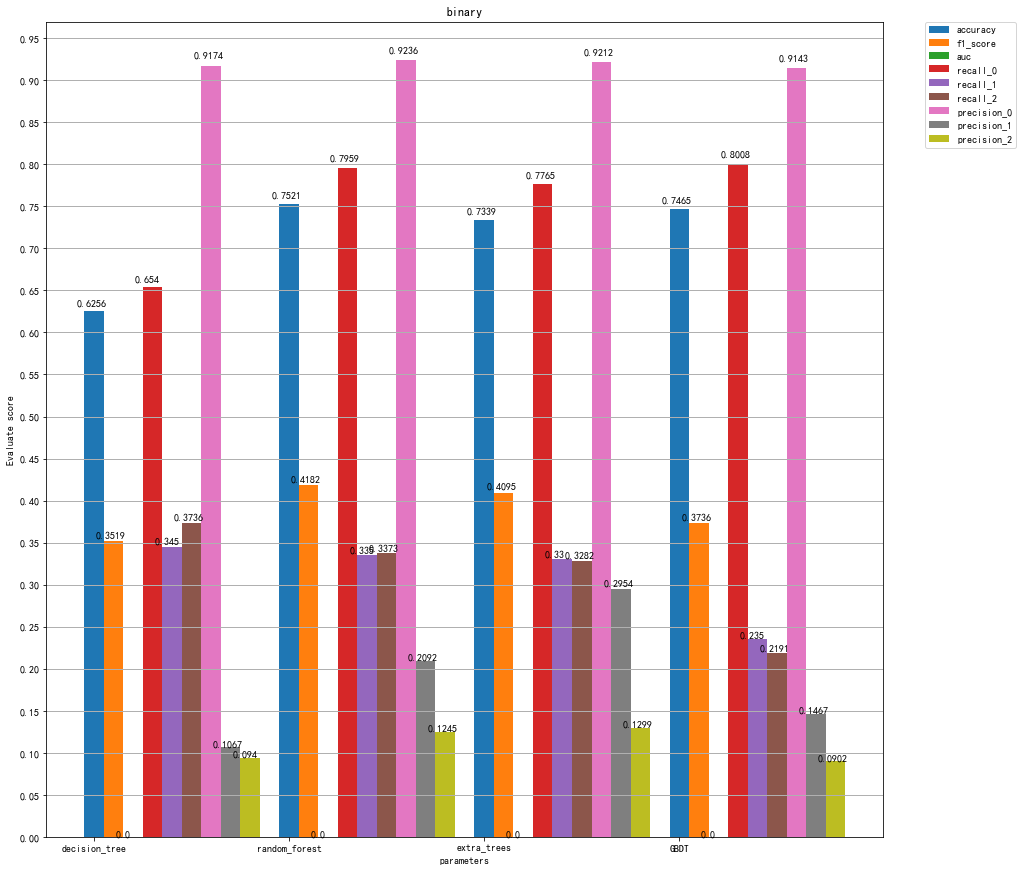

<Figure size 432x288 with 0 Axes>

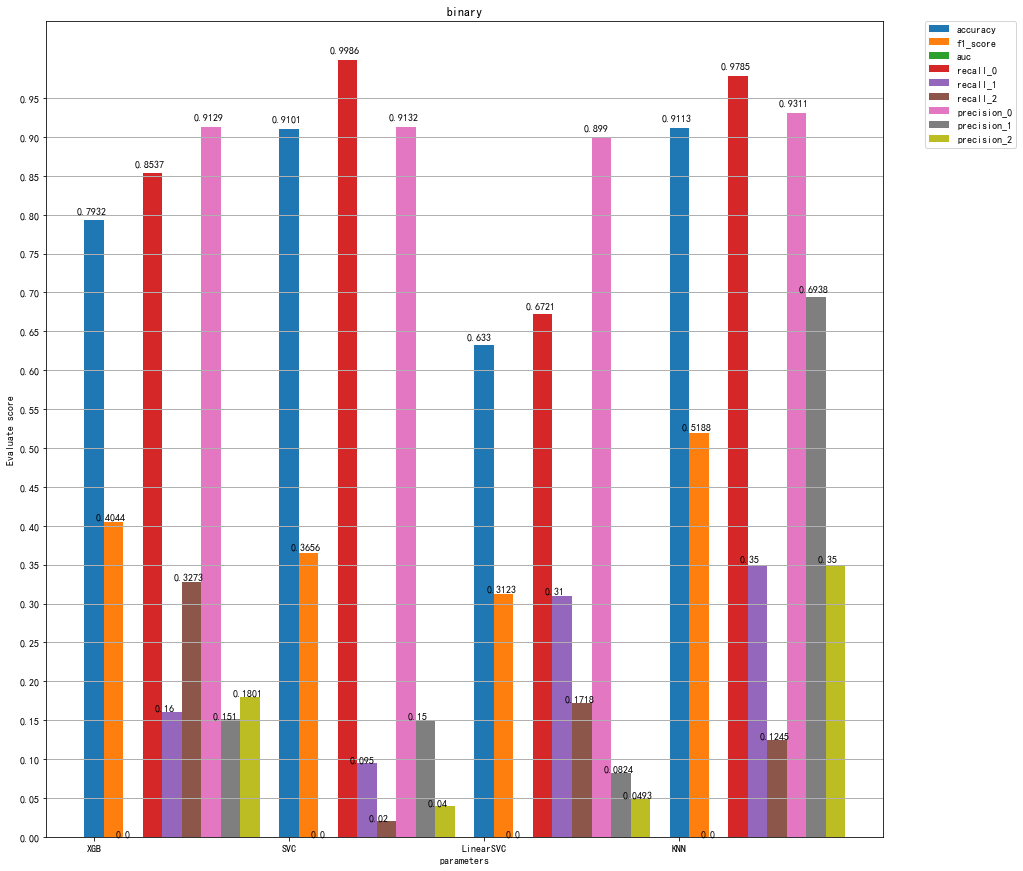

In [159]:
for res_pd, name in zip(result_pd_list, score_list):
    draw_result(res_pd.iloc[:4, :], name)
    draw_result(res_pd.iloc[4:8, :], name)
